# Regression Explore Exercises
### Corey Solitaire
### 2/29/2020

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

from wrangle import wrangle_telco
from wrangle import wrangle_grades

# Explore Exercise Walkthrough:
**Wrangle Grades**

In [17]:
# Sets defaults for matlplotlib figures
plt.rc('font', size = 13)
plt.rc('figure', figsize=(13,7))

In [18]:
df = wrangle_grades()

In [14]:
df.head(1)

,exam1,exam2,exam3,final_grade
0,100,90,95,96


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
train_and_validate, test = train_test_split(df, test_size = .1, random_state = 123)
train, validate = train_test_split(train_and_validate, test_size=.1, random_state =123)

train.shape, validate.shape, test.shape

((81, 4), (10, 4), (11, 4))

In [22]:
train.head()

,exam1,exam2,exam3,final_grade
1,98,93,96,95
20,73,70,75,76
78,100,90,95,96
29,83,80,86,85
75,58,65,70,68


**Goal:** To predict the final grade by examing the relationship between target variable(Final Grade) and independent variables (exam 1 - 3)

# EXAMPLE: Continuous and Continuous

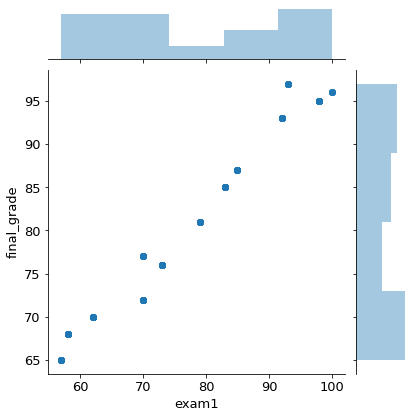

In [24]:
# Examine relationship between exam 1 and final grades
# exam1 and final_grade are both continuous data

# Jointplot: Combination scatterplot and histogram

sns.jointplot(x='exam1',y='final_grade', data=train)
plt.show()

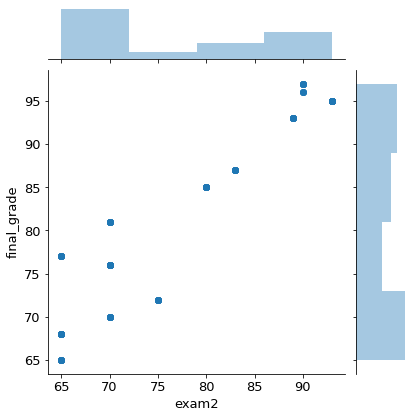

In [25]:
# Examine relationship between exam 2 and final grades
# exam1 and final_grade are both continuous data

# Jointplot: Combination scatterplot and histogram

sns.jointplot(x='exam2',y='final_grade', data=train)
plt.show()

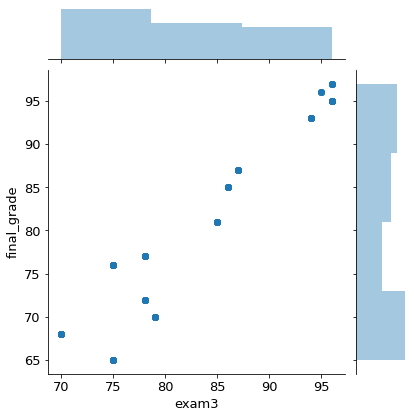

In [26]:
# Examine relationship between exam 3 and final grades
# exam1 and final_grade are both continuous data

# Jointplot: Combination scatterplot and histogram

sns.jointplot(x='exam3',y='final_grade', data=train)
plt.show()

### Takeaway:

- correlation highest between exam1 and final_grade

- correlation lowest between exam2 and final_grade

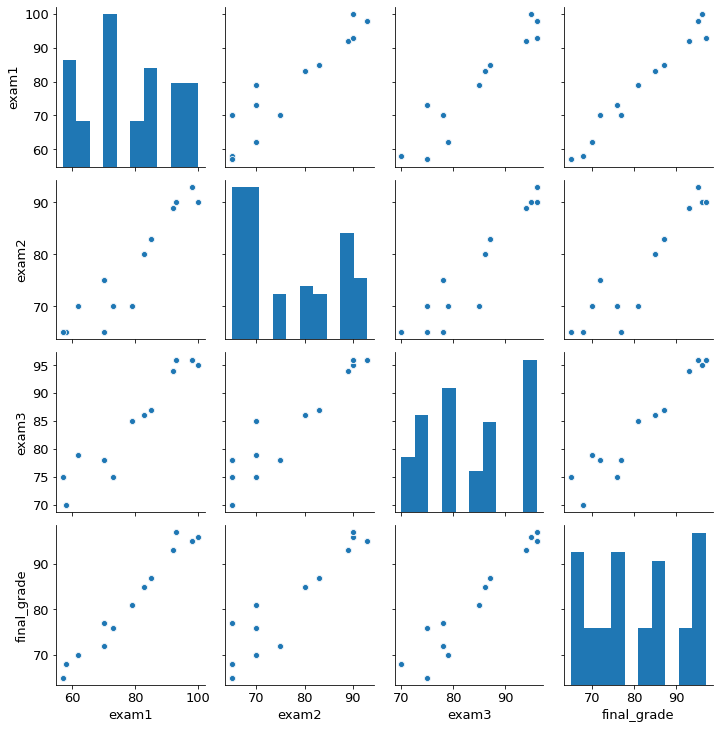

In [28]:
# Visualize all variables at the same time

sns.pairplot(train)
plt.show()

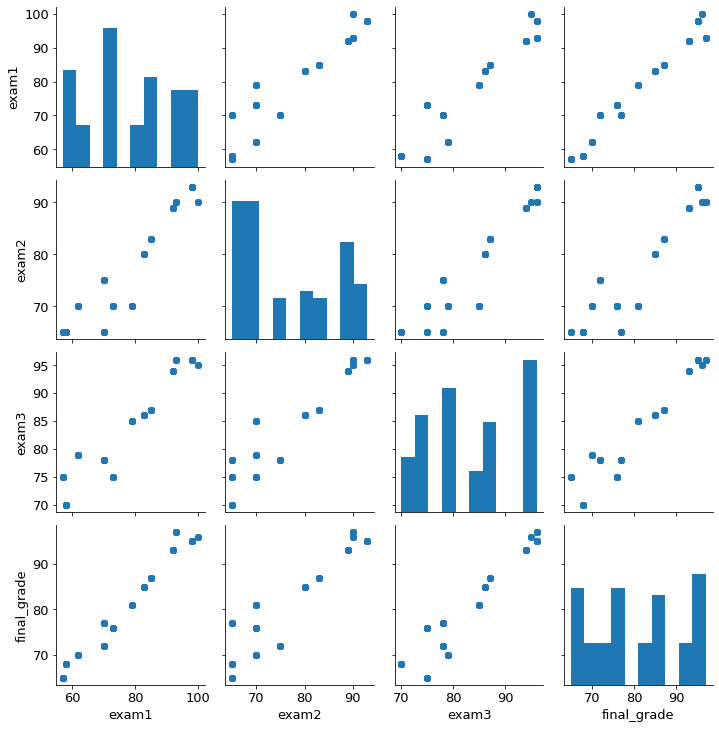

In [29]:
# Modified pairplot, pairgird
# Add more flexibility to visulization, def histogram on the diagionals and scatterplots everywhere else.

g=sns.PairGrid(train)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
plt.show()

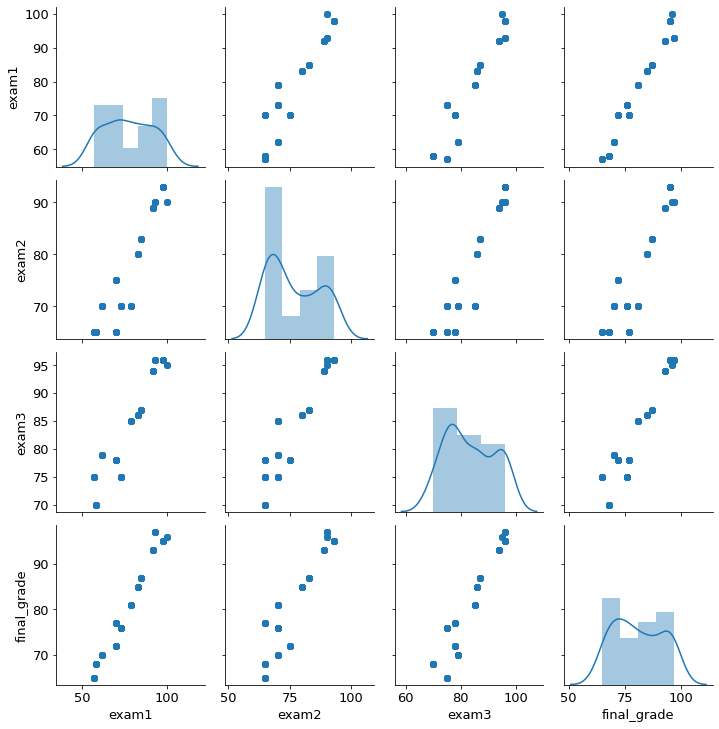

In [32]:
# same example with distplot on diagionals

g=sns.PairGrid(train)
g.map_diag(sns.distplot)
g.map_offdiag(plt.scatter)
plt.show()

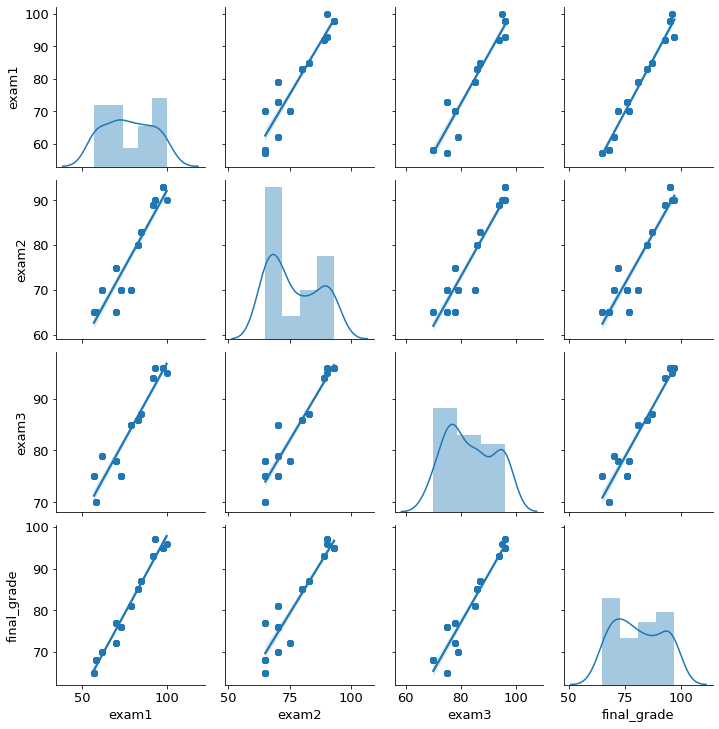

In [33]:
# same example with distplot and regplot

g=sns.PairGrid(train)
g.map_diag(sns.distplot)
g.map_offdiag(sns.regplot)
plt.show()

### Takeaway:
You can specifiy any two functions you want for your visulization in PairGrid

In [34]:
# Look at correlation coefficents between continous features
train.corr()

,exam1,exam2,exam3,final_grade
exam1,1.000000,0.934099,0.947911,0.985155
exam2,0.934099,1.000000,0.938353,0.926828
exam3,0.947911,0.938353,1.000000,0.954037
final_grade,0.985155,0.926828,0.954037,1.000000


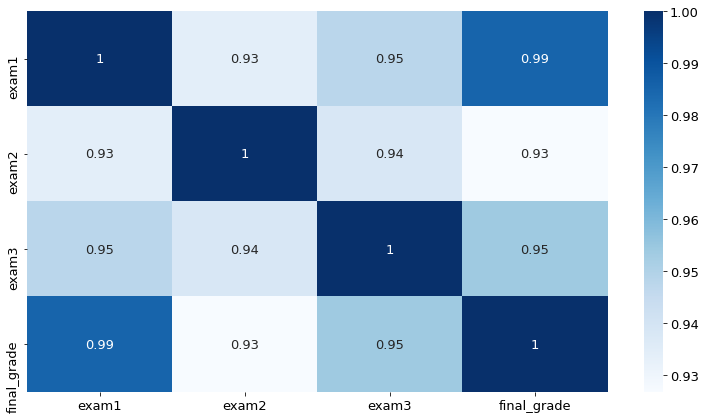

In [36]:
# Cool table, but maybe something more visually appealing like a heatmap
# annot =True gives your correlation coefficents

sns.heatmap(train.corr(), cmap='Blues', annot=True)
plt.show()

### Takeaway:

- Visual verification that exame 2 has the least correlation with final grade

- Exam 1 correlations strongest with final grade

# EXAMPLE: Continuous and Categorical

In [37]:
# Turn one exam in to letter grade to create a categorical variable

# Cut exame one in to 5 buckets, with custom bin widths
# .value_counts() gives you the grade break down for exam one

pd.cut(train.exam1, bins=[0, 70, 80, 90, 105], labels= ['F', 'C', 'B', 'A']).value_counts()

F    32
A    22
C    14
B    13
Name: exam1, dtype: int64

### Takeaway:

- This splitting is done just to visualize data (based on domain knowledge)

- Can be applied to the whole dataset if you plan us using the information for modeling

In [40]:
# Pandas series object of letter grade, transformed back in to dataframe

train['exam1_letter_grade'] = pd.cut(train.exam1, bins=[0, 70, 80, 90, 105], labels= ['F', 'C', 'B', 'A'])
train.head(1)

,exam1,exam2,exam3,final_grade,exam1_letter_grade
1,98,93,96,95,A


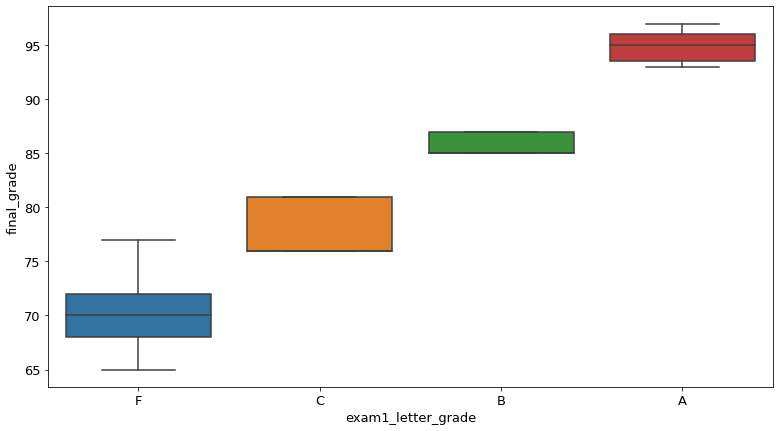

In [42]:
# Now we have a categorical feature to use (exam1_letter_grade)

# Boxplot
sns.boxplot(data=train, y='final_grade', x='exam1_letter_grade')
plt.show()

### Takeaway:

- students with F's not only have the lowest grade, but also the most variation in grades
  - Maybe due to different study habits or workflows?

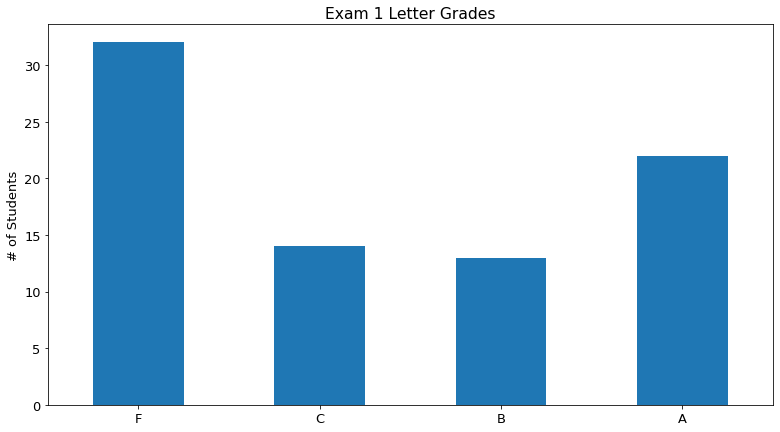

In [50]:
# Barplot

# Lets visualize count data
# sort index for alphabetical order then plot them
# Index turned in to labels, values graphed

train.exam1_letter_grade.value_counts().sort_index().plot.bar()
plt.ylabel('# of Students')
plt.title('Exam 1 Letter Grades')
# rotate x axis labels
plt.xticks(rotation=0)
plt.show()

In [52]:
# Adding fictitous cateorical data
np.random.seed(123)
# np.random.choice generates random value between (one and two)
# train.shape[0] tells pandas to fill the row with values
train['classroom'] = np.random.choice(['One', 'Two'], train.shape[0])
train

,exam1,exam2,exam3,final_grade,exam1_letter_grade,classroom
1,98,93,96,95,A,One
20,73,70,75,76,C,Two
78,100,90,95,96,A,One
29,83,80,86,85,B,One
75,58,65,70,68,F,One
...,...,...,...,...,...,...
85,73,70,75,76,C,One
66,98,93,96,95,A,One
49,58,65,70,68,F,One
55,83,80,86,85,B,Two


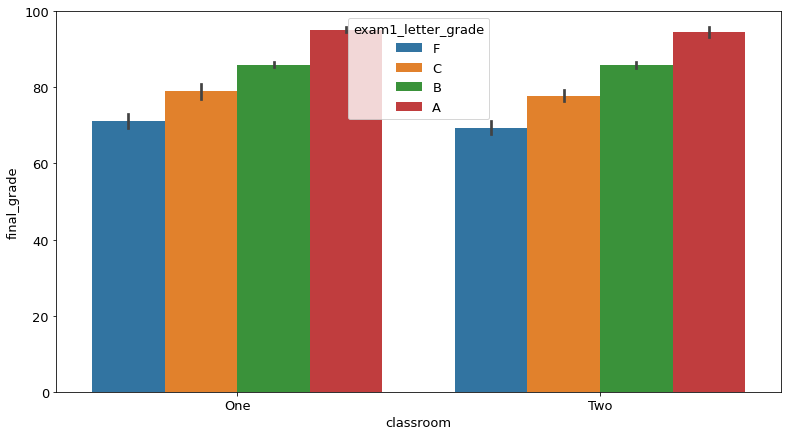

In [54]:
# bar plot of final grade average per classroom

# can add more information by adding hue (another cateorical variable)
sns.barplot(data=train, y='final_grade', x='classroom', hue='exam1_letter_grade' )
# Change limit to adjust range for better understanding
plt.ylim(0, 100)
plt.show()

### Takeaway:
The distribution of grades in classroom one and two are about the same

- Classroom has no effect on final_grade, can run a hypothesis test to confirm

### Hypothesis Testing: (2 sample T-test)

alpha = .05

Null - There is no difference between final grade between classroom one and two

Alternateive - There is a difference between final grade between classroom one and two

In [56]:
# We can now run a statiscial test to test hypothesis
# 2 tailed test because we are looking for any difference
# We have one continuous and one cateorical (2 sample t-test)

stats.ttest_ind(
    train[train.classroom == 'One'].final_grade,
    train[train.classroom == 'Two'].final_grade,
    equal_var = False,
)

Ttest_indResult(statistic=2.280491002945514, pvalue=0.025327198363860267)

### Takeaway:

P value is less then 0.05, test statistic is +, so we can reject the null hypothesis

*****

p-value: P(observe our data due to change | HO)

*****

If we generate a different random seed, we get different answers.  Think about the nature of random numbers, if you run a random experiement often enough you will get some incorrect values based only on chance

# EXAMPLE: Cateorical and Categorical

In [2]:
# Import prepared data from wrangle_telco
train, validate, test = wrangle_telco()

In [3]:
# Verify import executed correctly
train.shape, validate.shape, test.shape

((949, 7), (407, 7), (339, 7))

In [4]:
train.head(1)

,customer_id,monthly_charges,tenure,total_charges,total_charges_scaled,monthly_charges_scaled,tenure_scaled
1256,7501-IWUNG,73.8,61,4616.05,0.53241,0.552618,0.847222


# Exercises

**Our scenario continues:**

As a customer analyst, I want to know who has spent the most money with us over their lifetime. I have monthly charges and tenure, so I think I will be able to use those two attributes as features to estimate total_charges. I need to do this within an average of $5.00 per customer.

Create a file, explore.py, that contains the following functions for exploring your variables (features & target).

### 1. Write a function, plot_variable_pairs(dataframe) that plots all of the pairwise relationships along with the regression line for each pair.

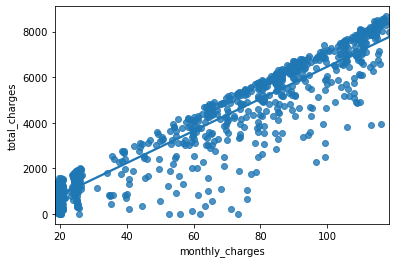

In [5]:
sns.regplot(x="monthly_charges",
            y="total_charges", 
            ci = None,
            data=train)

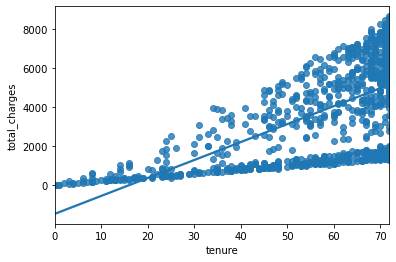

In [6]:
sns.regplot(x="tenure",
            y="total_charges", 
            ci = None,
            data=train)

In [7]:
def plot_variable_pairs():
    X = [train.monthly_charges, train.tenure]
    y = train.total_charges
    return sns.regplot(X,y)

In [8]:
plot_variable_pairs()

ValueError: regplot inputs must be 1d

### 2. Write a function, months_to_years(tenure_months, df) that returns your dataframe with a new feature tenure_years, in complete years as a customer.

### 3. Write a function, plot_categorical_and_continuous_vars(categorical_var, continuous_var, df), that outputs 3 different plots for plotting a categorical variable with a continuous variable, e.g. tenure_years with total_charges. For ideas on effective ways to visualize categorical with continuous: https://datavizcatalogue.com/. You can then look into seaborn and matplotlib documentation for ways to create plots.

# Warm Up:
### Group #2

#10 Participants

In [ ]:
#Visualization for each individual having 90% Chance of leaving
def distributions_example1():
    n = 10
    p = .90

    x = np.arange(0, 10)
    sf_x = stats.binom(n, p).sf(x)

    fig, (ax1) = plt.subplots(1, 1, figsize=(10, 8))
        
    ax1.bar(x, sf_x, width=1, edgecolor='black', color='white')
    ax1.set_ylabel('$P(X = x)$')
    ax1.set_xticks(range(21))
    ax1.set_title('Survival Function')


In [ ]:
distributions_example3()

In [ ]:
# 10 Participants, 90% Chance Stick Around, Prob 1/2 stay or more Stay (5 participants)
stats.binom(10, 0.9).sf(4)

In [ ]:
# Chance that 1 will leave
stats.binom(10, 0.9).pmf(9)

In [ ]:
# Chance that all stay
stats.binom(10, 0.9).pmf(10)

*****

In [ ]:
#Visualization for each individual having 80% Chance of leaving
def distributions_example2():
    n = 10
    p = .80

    x = np.arange(0, 10)
    sf_x = stats.binom(n, p).sf(x)

    fig, (ax1) = plt.subplots(1, 1, figsize=(10, 8))
        
    ax1.bar(x, sf_x, width=1, edgecolor='black', color='white')
    ax1.set_ylabel('$P(X = x)$')
    ax1.set_xticks(range(21))
    ax1.set_title('Survival Function')

In [ ]:
distributions_example2()

In [ ]:
# 10 Participants, 80% Chance Stick Around, Prob 1/2 stay or more Stay (5 participants)
stats.binom(10, 0.8).sf(4)

In [ ]:
# Chance that 1 will leave
stats.binom(10, 0.8).pmf(9)

In [ ]:
# Chance that all stay
stats.binom(10, 0.8).pmf(10)

*****

In [ ]:
#Visualization for each individual having 70% Chance of leaving
def distributions_example3():
    n = 10
    p = .70

    x = np.arange(0, 10)
    sf_x = stats.binom(n, p).sf(x)

    fig, (ax1) = plt.subplots(1, 1, figsize=(10, 8))
        
    ax1.bar(x, sf_x, width=1, edgecolor='black', color='white')
    ax1.set_ylabel('$P(X = x)$')
    ax1.set_xticks(range(21))
    ax1.set_title('Survival Function')


In [ ]:
distributions_example3()

In [ ]:
# 10 Participants, 70% Chance Stick Around, Prob 1/2 stay or more Stay (5 participants)
stats.binom(10, 0.7).sf(4)

In [ ]:
# Chance that 1 will leave
stats.binom(10, 0.7).pmf(9)

In [ ]:
# Chance that all stay
stats.binom(10, 0.7).pmf(10)

*****

#20 Participants

In [ ]:
# 20 Participants, 90% Chance Stick Around, Prob 1/2 stay or more Stay (5 participants)
stats.binom(20, 0.9).sf(9)

In [ ]:
# Chance that 1 will leave
stats.binom(20, 0.9).pmf(19)

In [ ]:
# Chance that all stay
stats.binom(20, 0.9).pmf(20)

*****

In [ ]:
# 20 Participants, 80% Chance Stick Around, Prob 1/2 stay or more Stay (5 participants)
stats.binom(20, 0.8).sf(9)

In [ ]:
# Chance that 1 will leave
stats.binom(20, 0.8).pmf(19)

In [ ]:
# Chance that all stay
stats.binom(20, 0.8).pmf(20)

*****

In [ ]:
# 20 Participants, 70% Chance Stick Around, Prob 1/2 stay or more Stay (5 participants)
stats.binom(20, 0.7).sf(9)

In [ ]:
# Chance that 1 will leave
stats.binom(20, 0.7).pmf(19)

In [ ]:
# Chance that all stay
stats.binom(20, 0.7).pmf(20)